In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import mutual_info_regression

In [19]:
# load data
melbourne_file_path = 'datasets/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [20]:
# filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [21]:
# show column names
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [22]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [23]:
# Suburb: Suburb
# Address: Address
# Rooms: Number of rooms
# Price: Price in Australian dollars

# Method:
# S - property sold;
# SP - property sold prior;
# PI - property passed in;
# PN - sold prior not disclosed;
# SN - sold not disclosed;
# NB - no bid;
# VB - vendor bid;
# W - withdrawn prior to auction;
# SA - sold after auction;
# SS - sold after auction price not disclosed.
# N/A - price or highest bid not available.

# Type:
# br - bedroom(s);
# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;
# dev site - development site;
# o res - other residential.

# SellerG: Real Estate Agent
# Date: Date sold
# Distance: Distance from CBD in Kilometres
# Regionname: General Region (West, North West, North, North east …etc)
# Propertycount: Number of properties that exist in the suburb.
# Bedroom2 : Scraped # of Bedrooms (from different source)
# Bathroom: Number of Bathrooms
# Car: Number of carspots
# Landsize: Land Size in Metres
# BuildingArea: Building Size in Metres
# YearBuilt: Year the house was built
# CouncilArea: Governing council for the area
# Lattitude: Self explanitory
# Longtitude: Self explanitory

In [24]:
# choose target and features
y = melbourne_data.Price

melbourne_features = [
    'Rooms',
    'Bathroom',
    'Landsize',
    'BuildingArea',
    'YearBuilt',
    'Lattitude',
    'Longtitude'
]

X = melbourne_data[melbourne_features]

In [25]:
# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [26]:
# train, pred and baseline MAE result for reference
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191669.7536453626


In [27]:
# mutual information (MI) analysis

In [28]:
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data = melbourne_data.dropna(axis=0)

# DataFrame.copy(deep=True) - makes a copy of this object’s indices and data
X = melbourne_data.copy()

# DataFrame.pop(item) - returns item and drop from frame
y = X.pop("Price")

# label encoding for categoricals
    # DataFrame.select_dtypes(include=None, exclude=None)
    #returns a subset of the DataFrame’s columns based on the column dtypes
for colname in X.select_dtypes("object"):
    # x.factorize()
    # this method is useful for obtaining a numeric representation
    # of an array when all that matters is identifying distinct values
    X[colname], _ = X[colname].factorize()

# all discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [29]:
# computes the MI scores for our features and wraps them up in a nice dataframe
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)

    # pandas.Series(data=None, index=None, name=None, ...)
    # One-dimensional ndarray with axis labels (including time series)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

Address        1.822879
Postcode       0.257593
CouncilArea    0.211027
SellerG        0.174630
Bathroom       0.160058
Longtitude     0.145728
Car            0.101269
Name: MI Scores, dtype: float64

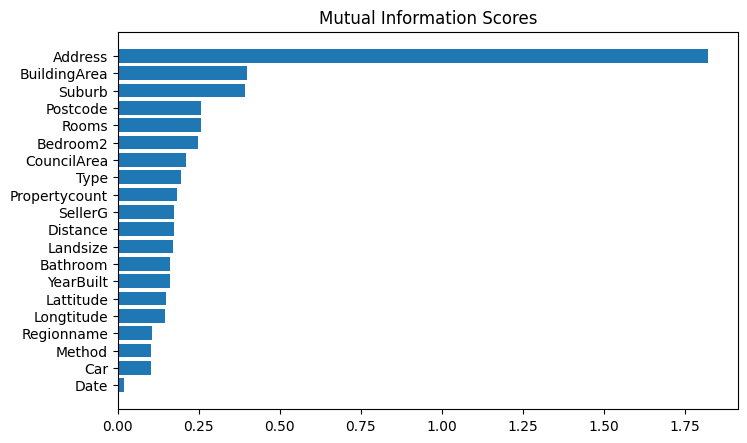

In [30]:
# bar plot to make comparisions easier
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [74]:
# Address has strong relationship with target
# sns.relplot(x="Address", y="Price", data=melbourne_data); # !!! takes too long to plot

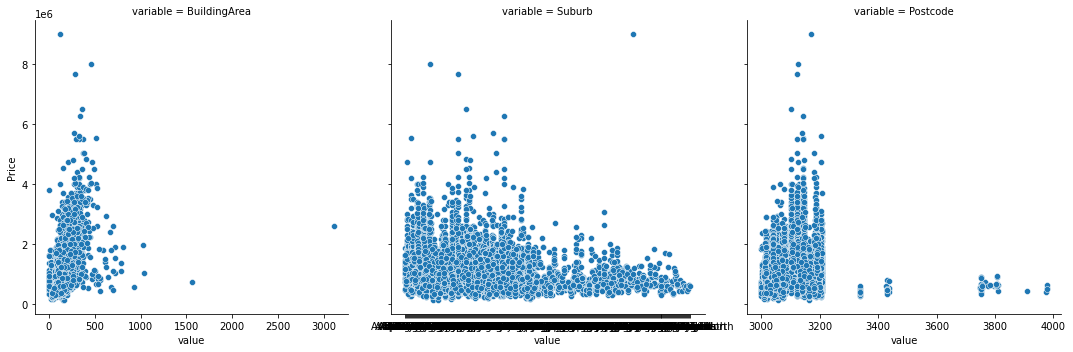

In [79]:
features = ["BuildingArea", "Suburb", "Postcode"]
# pandas.melt - unpivots a DataFrame from wide to long format, optionally leaving identifiers set
sns.relplot(
    x="value", y="Price", col="variable", data=melbourne_data.melt(id_vars="Price", value_vars=features), facet_kws=dict(sharex=False),
);

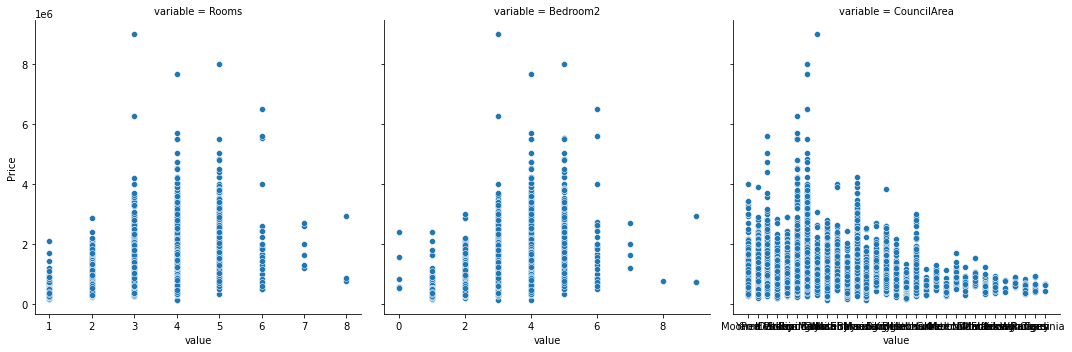

In [80]:
features = ["Rooms", "Bedroom2", "CouncilArea"]
sns.relplot(
    x="value", y="Price", col="variable", data=melbourne_data.melt(id_vars="Price", value_vars=features), facet_kws=dict(sharex=False),
);

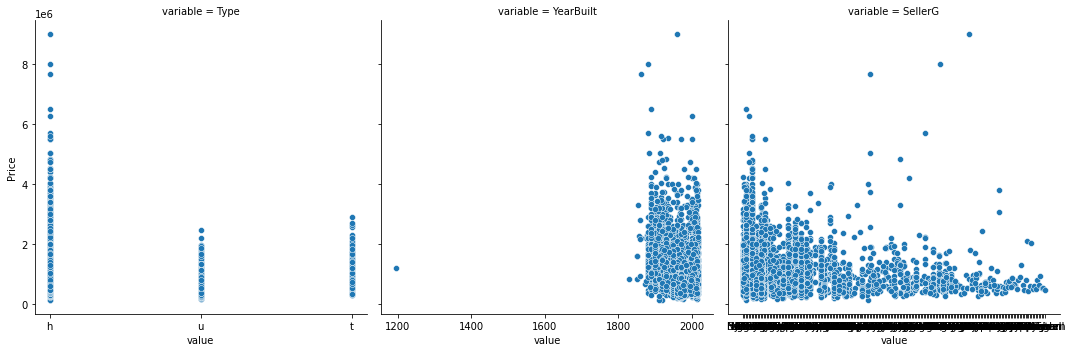

In [81]:
features = ["Type", "YearBuilt", "SellerG"]
sns.relplot(
    x="value", y="Price", col="variable", data=melbourne_data.melt(id_vars="Price", value_vars=features), facet_kws=dict(sharex=False),
);

In [82]:
# use new info for result improvement
melbourne_file_path = 'datasets/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data = melbourne_data.dropna(axis=0)
y = melbourne_data.Price
melbourne_features = [
    #'Suburb',
    'Postcode',
    #'Address',
    'Rooms',
    #'Method',
    #'Type',
    #'SellerG',
    #'Date',
    'Distance',
    #'Regionname',
    'Propertycount',
    'Bedroom2',
    'Bathroom',
    #'Car',
    'Landsize',
    'BuildingArea',
    'YearBuilt',
    #'CouncilArea',
    'Lattitude',
    'Longtitude'
]
X = melbourne_data[melbourne_features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))
# baseline MAE: 191669

182036.42684035786


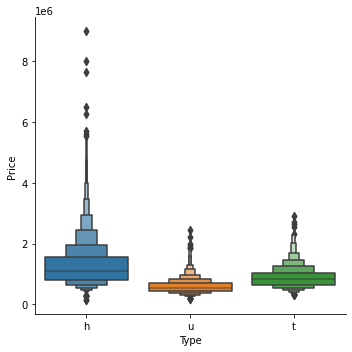

In [83]:
sns.catplot(x="Type", y="Price", data=melbourne_data, kind="boxen");